**Scaling**

- we have two types of scaling
    - z score (standardization)
    - min max scalar (Normalization) 

**z-score**

<img src="https://www.inchcalculator.com/wp-content/uploads/2022/11/z-score-formula.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 1280px; height: 100px; margin: 0px; width: 150px;" alt="Z-Score Calculator (with Formulas &amp; Steps) - Inch Calculator" jsname="kn3ccd">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = "D:\data-files\Visadataset.csv"
visadf = pd.read_csv(path)
cat = visadf.select_dtypes(include='object').columns
num = visadf.select_dtypes(exclude='object').columns


In [3]:
pwage = visadf['prevailing_wage']
mean = pwage.mean()
std = pwage.std()
Numerator = pwage-mean
Denominator = std
zscore = Numerator/Denominator
visadf['z_wage']=zscore
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504


In [4]:
visadf[['prevailing_wage','z_wage']]

,prevailing_wage,z_wage
0,592.2029,-1.398510
1,83425.6500,0.169832
2,122996.8600,0.919060
3,83434.0300,0.169991
4,149907.3900,1.428576
...,...,...
25475,77092.5700,0.049923
25476,279174.7900,3.876083
25477,146298.8500,1.360253
25478,86154.7700,0.221504


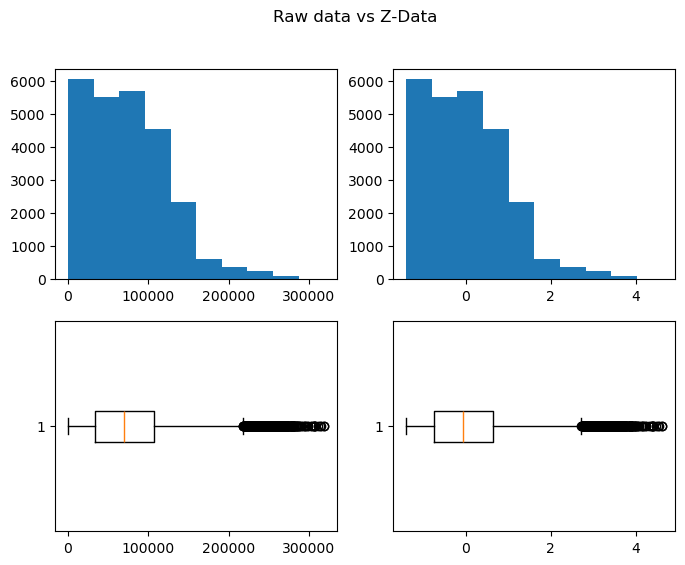

In [27]:
plt.figure(figsize=(8,6))
plt.suptitle('Raw data vs Z-Data')
pwage = visadf['prevailing_wage']
plt.subplot(2,2,1).hist(pwage)
z_wage = visadf['z_wage']
plt.subplot(2,2,2).hist(z_wage)
plt.subplot(2,2,3).boxplot(pwage,vert=False)
plt.subplot(2,2,4).boxplot(z_wage,vert=False)
plt.show()

**StandarScalar**

- under sklear
    - under preprocessing
        - StandardScalar  


In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wage = visadf['prevailing_wage']
ss.fit_transform(wage)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [41]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wage = visadf[['prevailing_wage']]
wagess = ss.fit_transform(wage)
visadf['wage_ss']=wagess
visadf['wage_ss','z_wage']

KeyError: ('wage_ss', 'z_wage')

In [56]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
wage = visadf[['prevailing_wage']]
wagess = ss.fit_transform(wage)
visadf['wage_ss']=wagess
visadf[['wage_ss','z_wage']]

,wage_ss,z_wage
0,-1.398537,-1.398510
1,0.169835,0.169832
2,0.919079,0.919060
3,0.169994,0.169991
4,1.428604,1.428576
...,...,...
25475,0.049924,0.049923
25476,3.876159,3.876083
25477,1.360280,1.360253
25478,0.221509,0.221504


In [42]:
wage = visadf['prevailing_wage'].values.reshape(-1,1)
ss.fit_transform(wage)

array([[-1.39853722],
       [ 0.1698353 ],
       [ 0.91907852],
       ...,
       [ 1.36027953],
       [ 0.22150859],
       [-0.06776315]])

**Min-Max Scalar**

<img src="https://miro.medium.com/v2/resize:fit:888/1*ye1I00S61GqpR34ABZZFLQ.png" jsaction="" class="sFlh5c FyHeAf iPVvYb" style="max-width: 444px; height: 100px; margin: 0px; width: 285px;" alt="How Min-Max Scaler Works. The math behind the min-max scaler ..." jsname="kn3ccd">

In [47]:
pwage = visadf['prevailing_wage']
nr = pwage-pwage.min()
dr = pwage.max()-pwage.min()
minmax_scale = nr/dr
visadf['minmax_scale']=minmax_scale
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss,minmax_scale
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510,-1.398537,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832,0.169835,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060,0.919079,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991,0.169994,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576,1.428604,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923,0.049924,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083,3.876159,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253,1.360280,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504,0.221509,0.269895


In [49]:
pwage = visadf['prevailing_wage']
minmax = (pwage-pwage.min())/(pwage.max()-pwage.min())
minmax

0        0.001849
1        0.261345
2        0.385312
3        0.261371
4        0.469616
           ...   
25475    0.241505
25476    0.874579
25477    0.458311
25478    0.269895
25479    0.222033
Name: prevailing_wage, Length: 25480, dtype: float64

In [52]:
from sklearn.preprocessing import MinMaxScaler
minmax_sc = MinMaxScaler()
pwage = visadf['prevailing_wage'].values.reshape(-1,1)
MinMaxScalar = minmax_sc.fit_transform(pwage)
visadf['MinMaxScalar']=MinMaxScalar

In [53]:
visadf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,z_wage,wage_ss,minmax_scale,MinMaxScalar
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,-1.398510,-1.398537,0.001849,0.001849
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,0.169832,0.169835,0.261345,0.261345
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,0.919060,0.919079,0.385312,0.385312
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,0.169991,0.169994,0.261371,0.261371
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,1.428576,1.428604,0.469616,0.469616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,0.049923,0.049924,0.241505,0.241505
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,3.876083,3.876159,0.874579,0.874579
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,1.360253,1.360280,0.458311,0.458311
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,0.221504,0.221509,0.269895,0.269895
